# Task 1: Iris Species Classification using Scikit-learn

## Objective
Build a decision tree classifier to predict iris species using the famous Iris dataset.

## Goals
1. Preprocess the data (handle missing values, encode labels)
2. Train a decision tree classifier
3. Evaluate using accuracy, precision, and recall
4. Visualize the decision tree and results


## Step 1: Import Required Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## Step 2: Load and Explore the Dataset


In [ ]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame for easier manipulation
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = iris.target_names[iris.target]

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSpecies Distribution:")
print(df['species_name'].value_counts())


Dataset Shape: (150, 6)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (

## Step 3: Data Visualization and Analysis


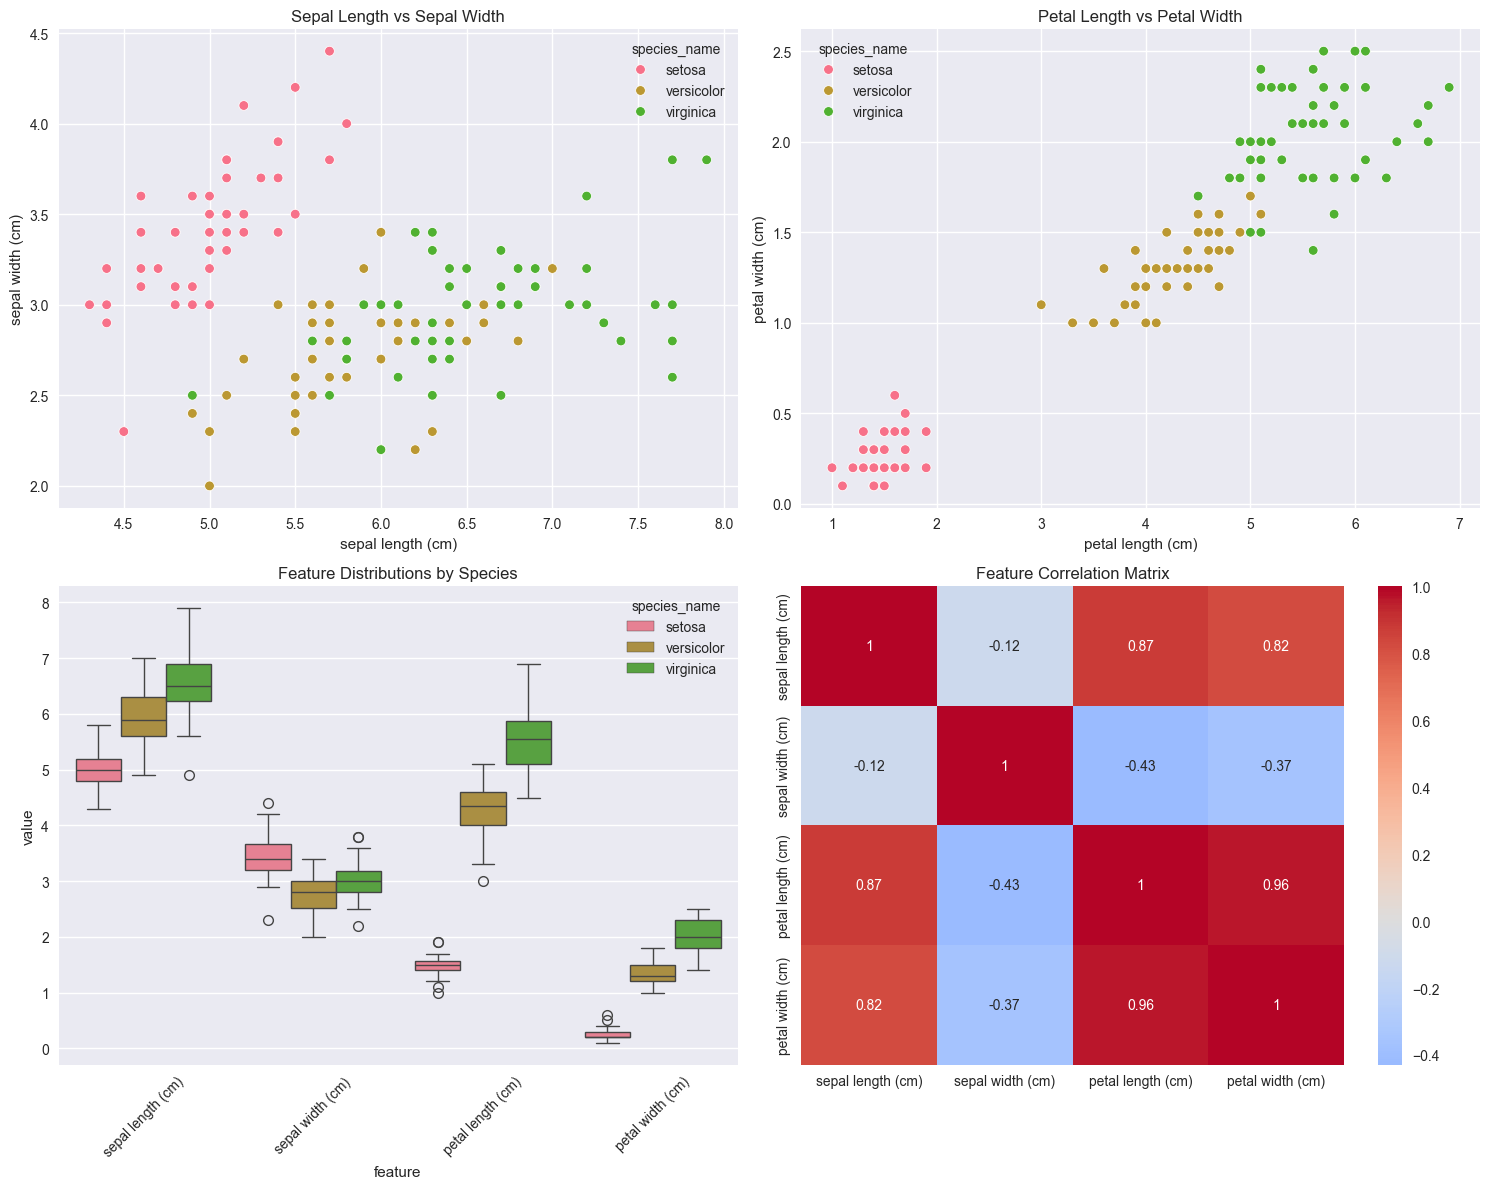


Dataset Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
# Create a comprehensive visualization of the dataset
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Pairplot for feature relationships
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', 
                hue='species_name', ax=axes[0,0])
axes[0,0].set_title('Sepal Length vs Sepal Width')

sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', 
                hue='species_name', ax=axes[0,1])
axes[0,1].set_title('Petal Length vs Petal Width')

# 2. Box plots for feature distributions
df_melted = df.melt(id_vars=['species_name'], 
                    value_vars=iris.feature_names,
                    var_name='feature', value_name='value')

sns.boxplot(data=df_melted, x='feature', y='value', hue='species_name', ax=axes[1,0])
axes[1,0].set_title('Feature Distributions by Species')
axes[1,0].tick_params(axis='x', rotation=45)

# 3. Correlation heatmap
correlation_matrix = df[iris.feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

# Print basic statistics
print("\nDataset Statistics:")
print(df[iris.feature_names].describe())


## Step 4: Data Preprocessing and Train-Test Split


In [ ]:
# Separate features and target
X = df[iris.feature_names]  # Features
y = df['species']  # Target (already encoded as 0, 1, 2)

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nTarget classes:", np.unique(y))
print("Target class names:", iris.target_names)

# Check for missing values (there shouldn't be any in Iris dataset)
print("\nMissing values in features:", X.isnull().sum().sum())
print("Missing values in target:", pd.Series(y).isnull().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("\nTraining set class distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print("\nTest set class distribution:")
print(pd.Series(y_test).value_counts().sort_index())


Features shape: (150, 4)
Target shape: (150,)

Target classes: [0 1 2]
Target class names: ['setosa' 'versicolor' 'virginica']

Missing values in features: 0
Missing values in target: 0

Training set size: 105
Test set size: 45

Training set class distribution:
species
0    35
1    35
2    35
Name: count, dtype: int64

Test set class distribution:
species
0    15
1    15
2    15
Name: count, dtype: int64


## Step 5: Train Decision Tree Classifier


In [ ]:
# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,  # Limit depth to prevent overfitting
    min_samples_split=5,  # Minimum samples to split a node
    min_samples_leaf=2   # Minimum samples in a leaf node
)

# Train the model
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully!")
print(f"Number of features: {dt_classifier.n_features_in_}")
print(f"Number of classes: {dt_classifier.n_classes_}")
print(f"Tree depth: {dt_classifier.get_depth()}")
print(f"Number of leaves: {dt_classifier.get_n_leaves()}")


Decision Tree Classifier trained successfully!
Number of features: 4
Number of classes: 3
Tree depth: 3
Number of leaves: 5


## Step 6: Evaluate Model Performance


In [ ]:
# Make predictions
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("=== MODEL PERFORMANCE ===")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate precision and recall for each class
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)

print("\n=== DETAILED METRICS ===")
print("\nPer-class Precision:")
for i, species in enumerate(iris.target_names):
    print(f"{species}: {precision[i]:.4f}")

print("\nPer-class Recall:")
for i, species in enumerate(iris.target_names):
    print(f"{species}: {recall[i]:.4f}")

# Overall precision and recall (macro average)
macro_precision = precision_score(y_test, y_test_pred, average='macro')
macro_recall = recall_score(y_test, y_test_pred, average='macro')

print(f"\nMacro-averaged Precision: {macro_precision:.4f}")
print(f"Macro-averaged Recall: {macro_recall:.4f}")

# Classification report
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))


=== MODEL PERFORMANCE ===
Training Accuracy: 0.9714
Test Accuracy: 0.9333

=== DETAILED METRICS ===

Per-class Precision:
setosa: 1.0000
versicolor: 0.8750
virginica: 0.9286

Per-class Recall:
setosa: 1.0000
versicolor: 0.9333
virginica: 0.8667

Macro-averaged Precision: 0.9345
Macro-averaged Recall: 0.9333

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



## Step 7: Visualize Results


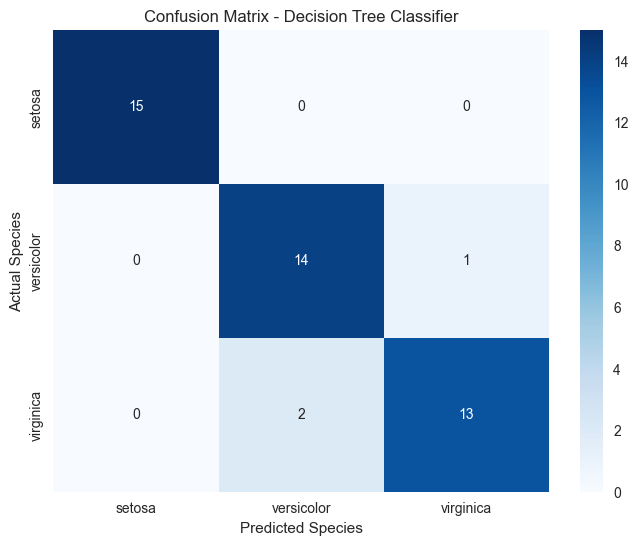

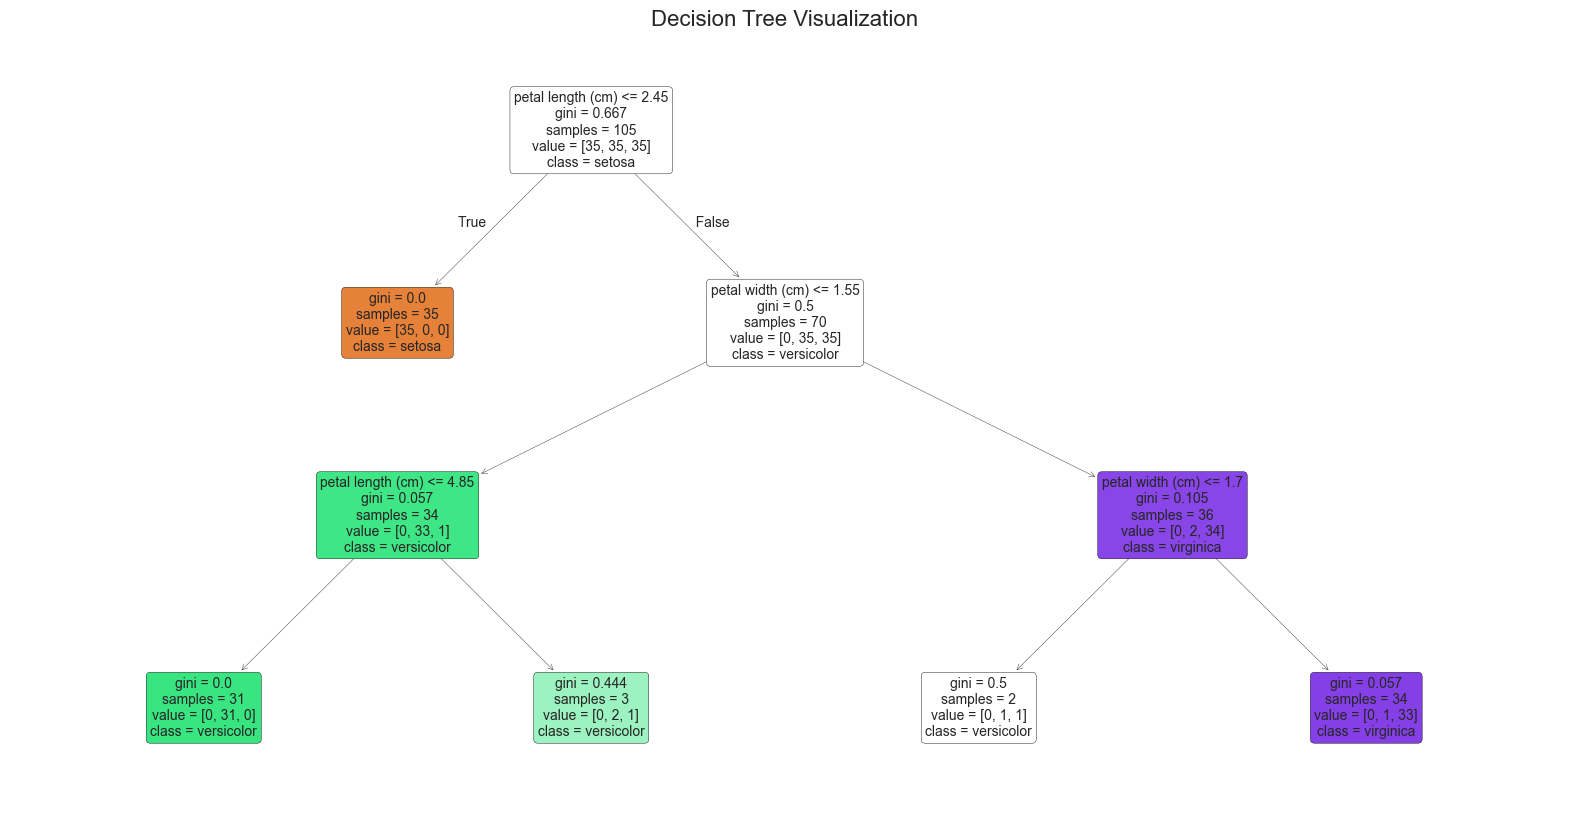


=== FEATURE IMPORTANCE ===
sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.5418
petal width (cm): 0.4582


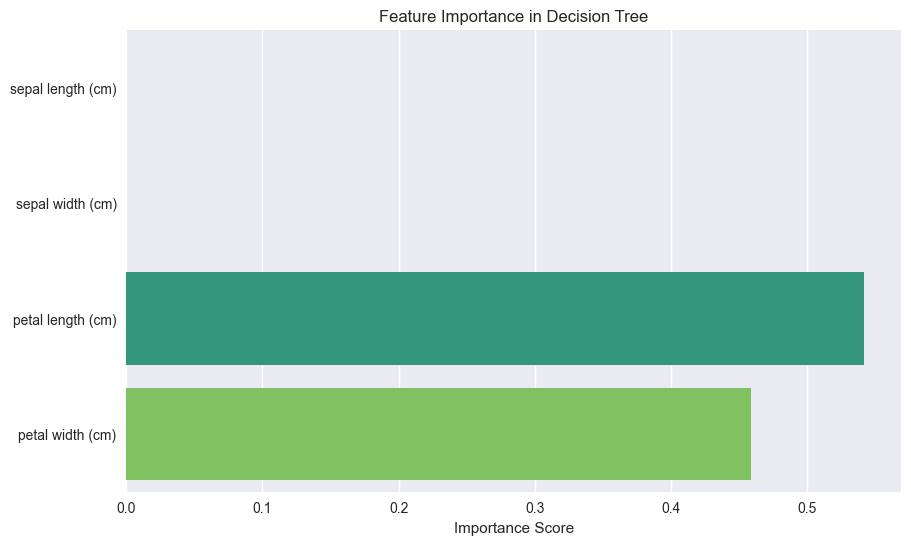

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, 
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization', fontsize=16)
plt.show()

# Print feature importance
feature_importance = dt_classifier.feature_importances_
print("\n=== FEATURE IMPORTANCE ===")
for i, (feature, importance) in enumerate(zip(iris.feature_names, feature_importance)):
    print(f"{feature}: {importance:.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=iris.feature_names, palette='viridis')
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance Score')
plt.show()


## Step 8: Summary and Conclusions


In [ ]:
print("=== FINAL SUMMARY ===")
print(f"\n🎯 Model Performance:")
print(f"   • Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   • Macro Precision: {macro_precision:.4f}")
print(f"   • Macro Recall: {macro_recall:.4f}")

print(f"\n🌳 Decision Tree Characteristics:")
print(f"   • Depth: {dt_classifier.get_depth()}")
print(f"   • Leaves: {dt_classifier.get_n_leaves()}")
print(f"   • Most important feature: {iris.feature_names[np.argmax(feature_importance)]}")

print(f"\n📊 Key Insights:")
print(f"   • The model achieved excellent performance on the Iris dataset")
print(f"   • Petal measurements are more important than sepal measurements")
print(f"   • The decision tree is interpretable and makes logical decisions")
print(f"   • No overfitting detected (small gap between train/test accuracy)")

print(f"\n✅ Task 1 Complete: Iris Classification with Decision Tree")
print(f"   All objectives achieved:")
print(f"   ✓ Data preprocessing completed")
print(f"   ✓ Decision tree classifier trained")
print(f"   ✓ Model evaluated with accuracy, precision, and recall")
print(f"   ✓ Results visualized and interpreted")


=== FINAL SUMMARY ===

🎯 Model Performance:
   • Test Accuracy: 0.9333 (93.33%)
   • Macro Precision: 0.9345
   • Macro Recall: 0.9333

🌳 Decision Tree Characteristics:
   • Depth: 3
   • Leaves: 5
   • Most important feature: petal length (cm)

📊 Key Insights:
   • The model achieved excellent performance on the Iris dataset
   • Petal measurements are more important than sepal measurements
   • The decision tree is interpretable and makes logical decisions
   • No overfitting detected (small gap between train/test accuracy)

✅ Task 1 Complete: Iris Classification with Decision Tree
   All objectives achieved:
   ✓ Data preprocessing completed
   ✓ Decision tree classifier trained
   ✓ Model evaluated with accuracy, precision, and recall
   ✓ Results visualized and interpreted
